The goal of this project is to build a forecasting tool to help a retail business plan inventory. By predicting daily sales, we aim to reduce overstocking risks and ensure enough supply for high-demand periods like the holidays.

url of the data resource: https://archive.ics.uci.edu/dataset/352/online+retail

In [ ]:


!unzip "/content/online+retail.zip" -d "/content"

unzip:  cannot find or open /content/online+retail.zip, /content/online+retail.zip.zip or /content/online+retail.zip.ZIP.


In [ ]:
import numpy as np
import pandas as pd
import datetime as dt

In [ ]:
d=pd.read_excel("/content/Online Retail.xlsx")

In [ ]:
d.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
len(d)

541909

In [ ]:
d.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [ ]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
d = d[d['CustomerID'].notna()]#deleting rows with no customerid

In [ ]:
d['CustomerID'] = d['CustomerID'].astype(int)

In [ ]:
d['Quantity'] = d['Quantity'].abs()#fixing the negative values

In [ ]:
d['InvoiceNo'] = d['InvoiceNo'].astype(str).str.replace(r'\D', '', regex=True)#setting invoice into digits only

In [ ]:
d = d[d["UnitPrice"] != 0]

In [ ]:
d["InvoiceDate"] = d["InvoiceDate"].apply(pd.to_datetime)

In [ ]:
prefixes = d['InvoiceNo'].astype(str).str.extract(r'(^[^0-9])')[0].unique()#checking if the invoice has alphabet

In [ ]:
prefixes

array([nan], dtype=object)

In [ ]:

d.duplicated().sum()

np.int64(5225)

In [ ]:
d = d.drop_duplicates()#deleting duplicates

In [ ]:
d['Total'] = d['Quantity'] * d['UnitPrice']

In [ ]:
d.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID,Total
count,401564.000000,401564,401564.000000,401564.000000,401564.000000
mean,13.509769,2011-07-10 12:06:07.514567936,3.474410,15281.266797,23.647285
min,1.000000,2010-12-01 08:26:00,0.001000,12346.000000,0.001000
25%,2.000000,2011-04-06 15:02:00,1.250000,13939.000000,4.950000
50%,6.000000,2011-07-29 15:32:30,1.950000,15145.000000,11.900000
75%,12.000000,2011-10-20 11:58:00,3.750000,16788.000000,19.800000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000,168469.600000
std,249.442715,NaN,69.767501,1713.978947,430.217678


In [ ]:
d.info()

<class 'pandas.core.frame.DataFrame'>
Index: 401564 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    401564 non-null  object        
 1   StockCode    401564 non-null  object        
 2   Description  401564 non-null  object        
 3   Quantity     401564 non-null  int64         
 4   InvoiceDate  401564 non-null  datetime64[ns]
 5   UnitPrice    401564 non-null  float64       
 6   CustomerID   401564 non-null  int64         
 7   Country      401564 non-null  object        
 8   Total        401564 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 30.6+ MB


In [ ]:
d.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0
Total,0


In [ ]:
d.nunique()

,0
InvoiceNo,22186
StockCode,3684
Description,3896
Quantity,309
InvoiceDate,20456
UnitPrice,619
CustomerID,4371
Country,37
Total,3163


In [ ]:
d['Country'].value_counts()

,count
Country,
United Kingdom,356704
Germany,9478
France,8474
EIRE,7473
Spain,2527
Netherlands,2367
Belgium,2069
Switzerland,1876
Portugal,1471


In [ ]:
most_exp = d.loc[d['UnitPrice'] == d['UnitPrice'].max()]
most_exp

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total
222681,556445,M,Manual,1,2011-06-10 15:31:00,38970.0,15098,United Kingdom,38970.0


In [ ]:
cheap = d.loc[d['UnitPrice'] == d['UnitPrice'].min()]
cheap

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total
157195,550193,PADS,PADS TO MATCH ALL CUSHIONS,1,2011-04-15 09:27:00,0.001,13952,United Kingdom,0.001
279045,561226,PADS,PADS TO MATCH ALL CUSHIONS,1,2011-07-26 10:13:00,0.001,15618,United Kingdom,0.001
359871,568200,PADS,PADS TO MATCH ALL CUSHIONS,1,2011-09-25 14:58:00,0.001,16198,United Kingdom,0.001
361741,568375,BANK CHARGES,Bank Charges,1,2011-09-26 17:01:00,0.001,13405,United Kingdom,0.001


In [ ]:
import matplotlib.pyplot as plt


customer_spend = d.groupby('CustomerID')['Total'].sum().reset_index()

top_customers = customer_spend.sort_values(by='Total', ascending=False).head(10)


top_customers['CustomerID'] = top_customers['CustomerID'].astype(int).astype(str)

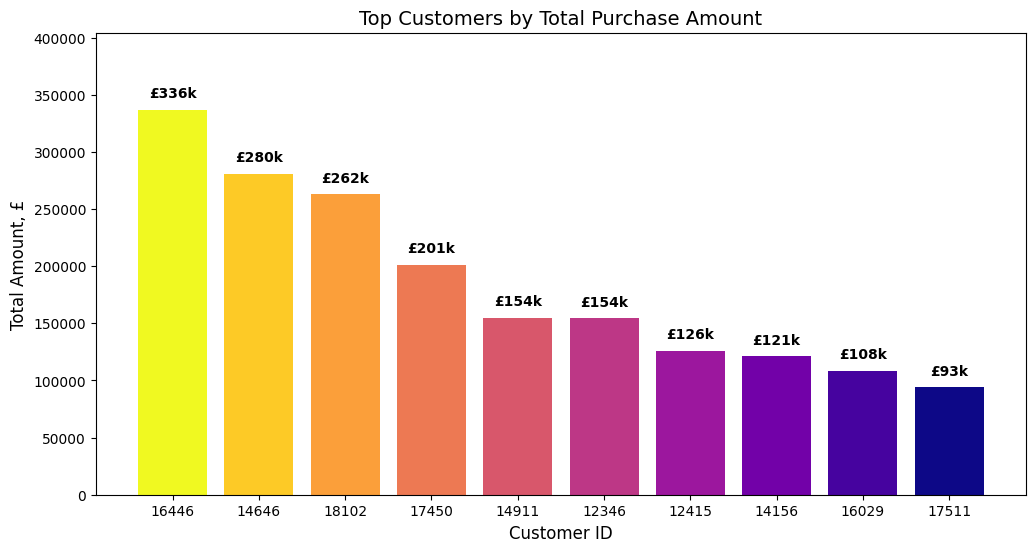

In [ ]:

plt.figure(figsize=(12, 6))


colors = plt.cm.plasma_r(np.linspace(0, 1, 10))


bars = plt.bar(top_customers['CustomerID'], top_customers['Total'], color=colors)


plt.xlabel('Customer ID', fontsize=12)
plt.ylabel('Total Amount, £', fontsize=12)
plt.title('Top Customers by Total Purchase Amount', fontsize=14)


for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 20000,
             f'£{int(yval/1000)}k',
             va='top', ha='center', color='black', fontweight='bold')
plt.ylim(0, max(top_customers['Total']) * 1.2)
plt.show()

In [ ]:
rare_customers = customer_spend.sort_values(by='Total', ascending=True).head(10)

rare_customers['CustomerID'] = rare_customers['CustomerID'].astype(int).astype(str)

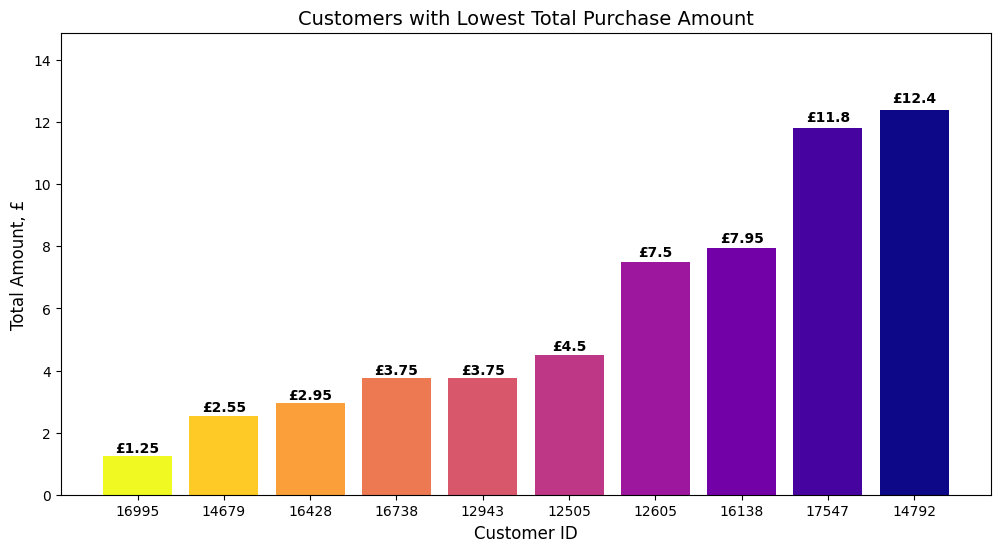

In [ ]:
plt.figure(figsize=(12, 6))
bars = plt.bar(rare_customers['CustomerID'], rare_customers['Total'], color=colors)

plt.xlabel('Customer ID', fontsize=12)
plt.ylabel('Total Amount, £', fontsize=12)
plt.title('Customers with Lowest Total Purchase Amount', fontsize=14)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + (yval * 0.01),
             f'£{round(yval, 2)}',
             va='bottom', ha='center', color='black', fontweight='bold')

plt.ylim(0, max(rare_customers['Total']) * 1.2)
plt.show()

In [ ]:

country_spend = d.groupby('Country')['Total'].sum().reset_index()

top_countries = country_spend.sort_values(by='Total', ascending=False).head(10)


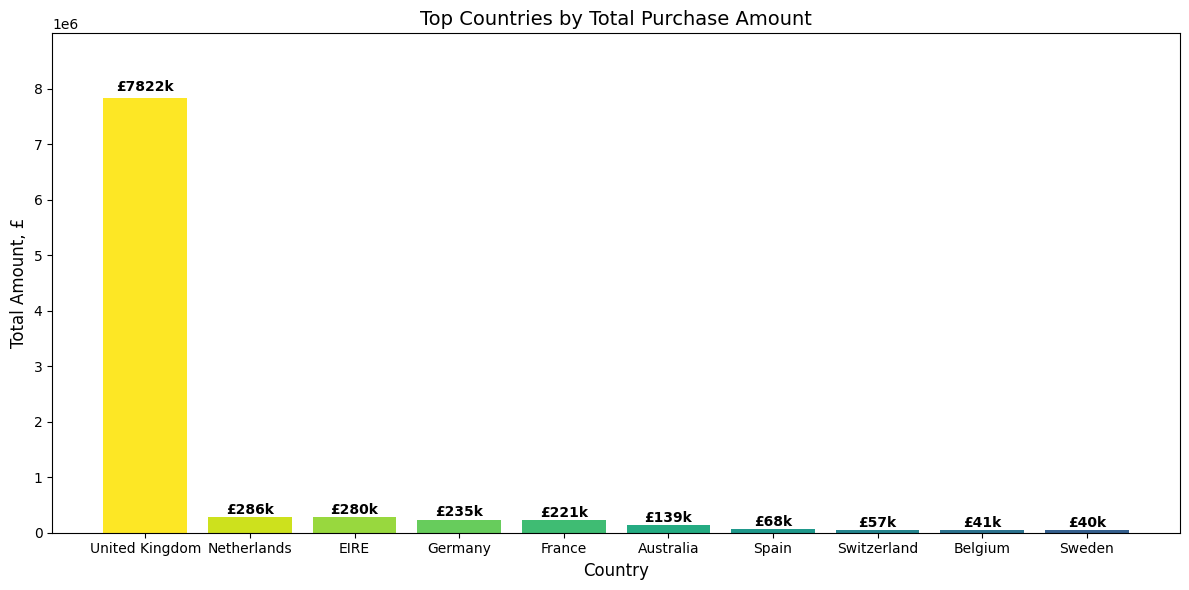

In [ ]:
plt.figure(figsize=(12, 6))

colors = plt.cm.viridis_r(np.linspace(0, 0.7, 10))

bars = plt.bar(top_countries['Country'], top_countries['Total'], color=colors)

plt.xlabel('Country', fontsize=12)
plt.ylabel('Total Amount, £', fontsize=12)
plt.title('Top Countries by Total Purchase Amount', fontsize=14)

for bar in bars:
    yval = bar.get_height()

    plt.text(bar.get_x() + bar.get_width()/2, yval + (yval * 0.01),
             f'£{int(yval/1000)}k',
             va='bottom', ha='center', fontsize=10, fontweight='bold')


plt.ylim(0, max(top_countries['Total']) * 1.15)
plt.tight_layout()
plt.show()

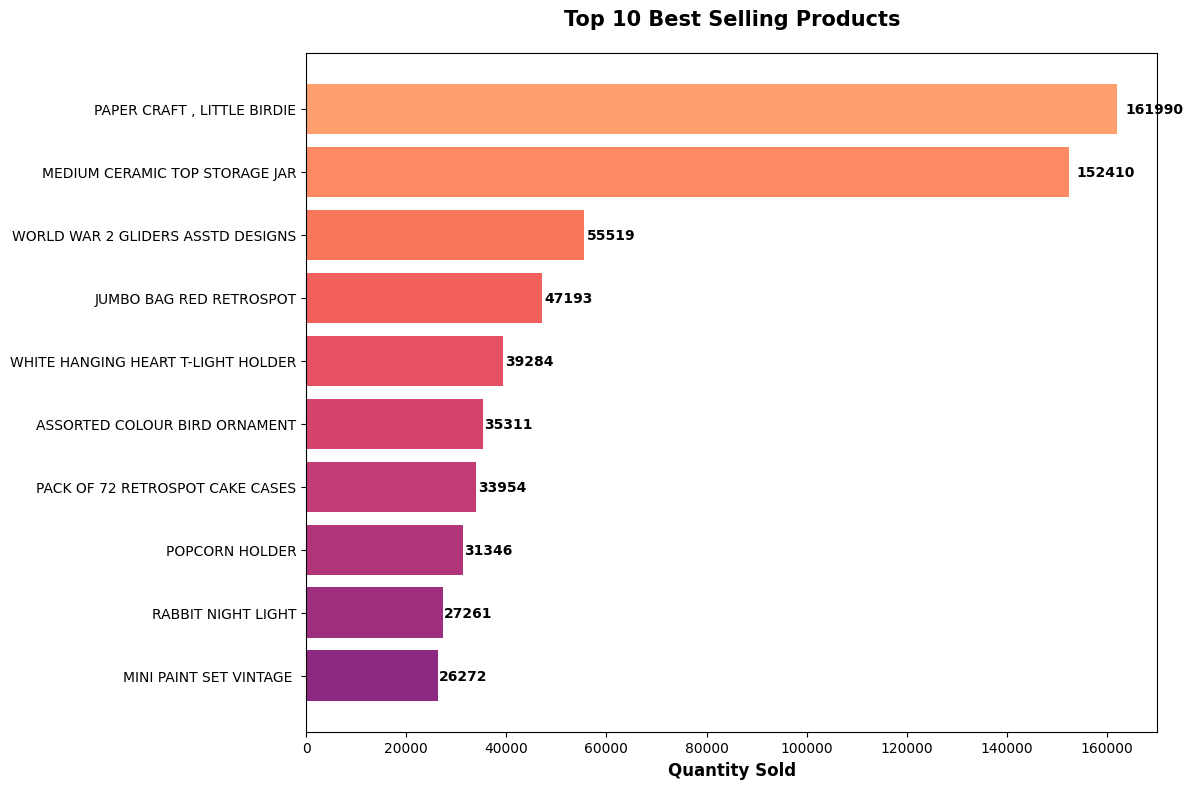

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

top_products = d.groupby('Description')['Quantity'].sum().reset_index()
top_products = top_products.sort_values(by='Quantity', ascending=False).head(10)

plt.figure(figsize=(12, 8))
colors = plt.cm.magma(np.linspace(0.4, 0.8, 10))

bars = plt.barh(top_products['Description'], top_products['Quantity'], color=colors[::-1])

plt.xlabel('Quantity Sold', fontsize=12, fontweight='bold')
plt.title('Top 10 Best Selling Products', fontsize=15, fontweight='bold', pad=20)

for bar in bars:
    width = bar.get_width()
    plt.text(width + (width * 0.01),
             bar.get_y() + bar.get_height()/2,
             f'{int(width)}',
             va='center',
             ha='left',
             fontsize=10,
             fontweight='bold')

plt.gca().invert_yaxis() # Putting the #1 product at the top
plt.tight_layout()
plt.show()

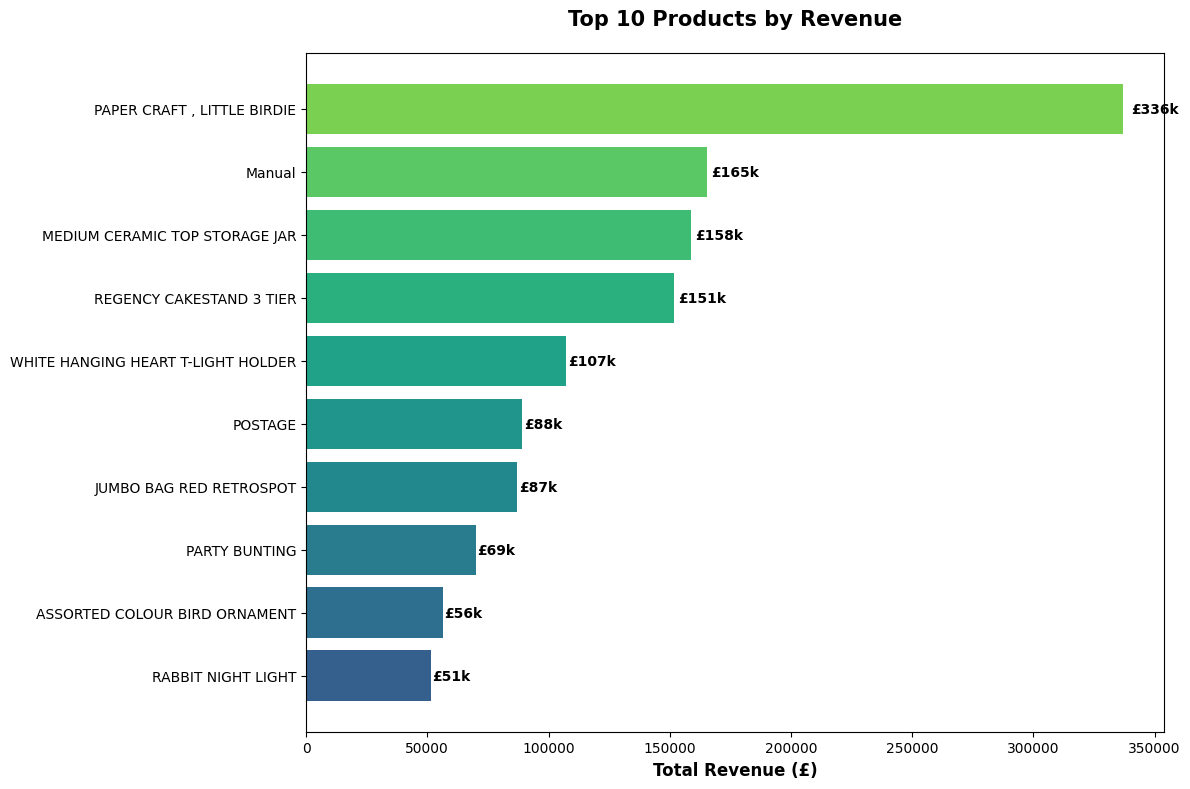

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

top_revenue_products = d.groupby('Description')['Total'].sum().reset_index()

top_revenue_products = top_revenue_products.sort_values(by='Total', ascending=False).head(10)

plt.figure(figsize=(12, 8))
colors = plt.cm.viridis(np.linspace(0.3, 0.8, 10))

bars = plt.barh(top_revenue_products['Description'], top_revenue_products['Total'], color=colors[::-1])

plt.xlabel('Total Revenue (£)', fontsize=12, fontweight='bold')
plt.title('Top 10 Products by Revenue', fontsize=15, fontweight='bold', pad=20)

for bar in bars:
    width = bar.get_width()
    plt.text(width + (width * 0.01),
             bar.get_y() + bar.get_height()/2,
             f'£{int(width/1000)}k',
             va='center',
             ha='left',
             fontsize=10,
             fontweight='bold')

plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [ ]:
d['InvoiceDate'].describe()

,InvoiceDate
count,401564
mean,2011-07-10 12:06:07.514567936
min,2010-12-01 08:26:00
25%,2011-04-06 15:02:00
50%,2011-07-29 15:32:30
75%,2011-10-20 11:58:00
max,2011-12-09 12:50:00


In [ ]:
d['YearMonth'] = d['InvoiceDate'].dt.to_period('M').astype(str)

In [ ]:
monthly_sales = d.groupby('YearMonth')['Total'].sum().reset_index()

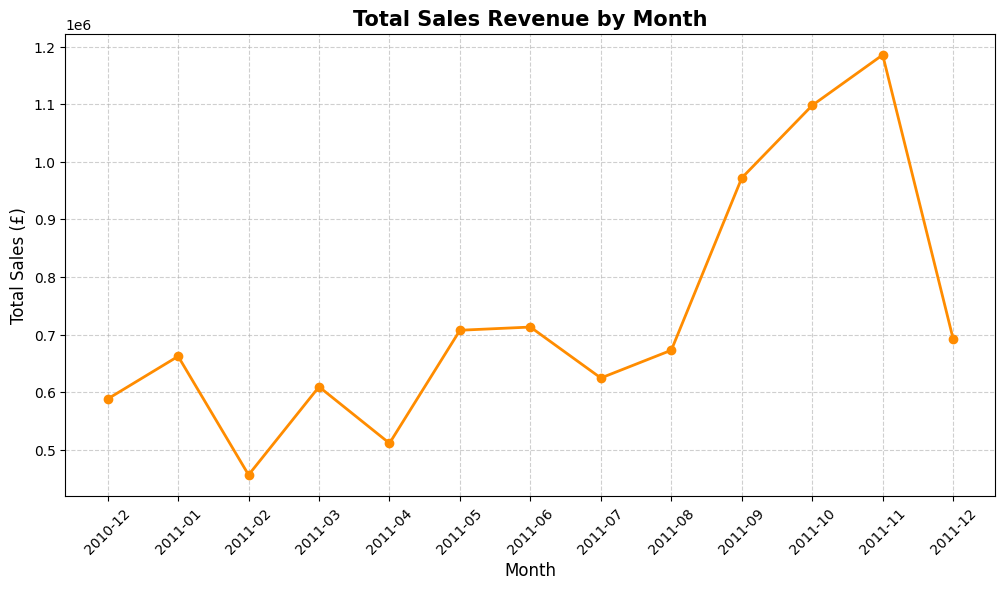

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['YearMonth'], monthly_sales['Total'], marker='o', color='darkorange', linewidth=2)

plt.title('Total Sales Revenue by Month', fontsize=15, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales (£)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


In [ ]:
peak_month = monthly_sales.loc[monthly_sales['Total'].idxmax()]
print(f"The highest sales were in {peak_month['YearMonth']} with a total of £{peak_month['Total']:,.2f}")

The highest sales were in 2011-11 with a total of £1,185,596.15


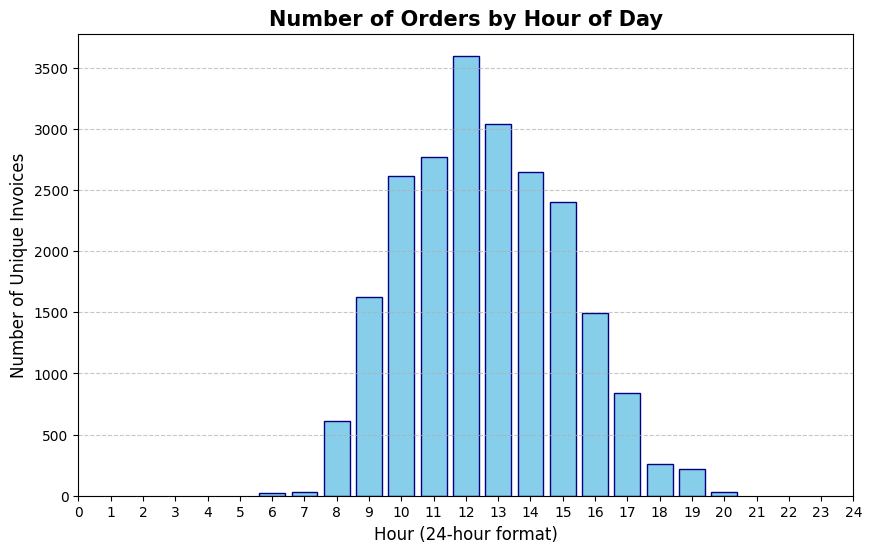

In [ ]:

d['Hour'] = d['InvoiceDate'].dt.hour

hourly_sales = d.groupby('Hour')['InvoiceNo'].nunique().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(hourly_sales['Hour'], hourly_sales['InvoiceNo'], color='skyblue', edgecolor='navy')

plt.title('Number of Orders by Hour of Day', fontsize=15, fontweight='bold')
plt.xlabel('Hour (24-hour format)', fontsize=12)
plt.ylabel('Number of Unique Invoices', fontsize=12)
plt.xticks(range(0, 25))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Based on these 2 figures:

Seasonality: We can see a massive spike in November. In retail datasets, this is common due to "Black Friday" and early Christmas shopping.

Most sales peak between 10:00 AM and 1:00 PM.

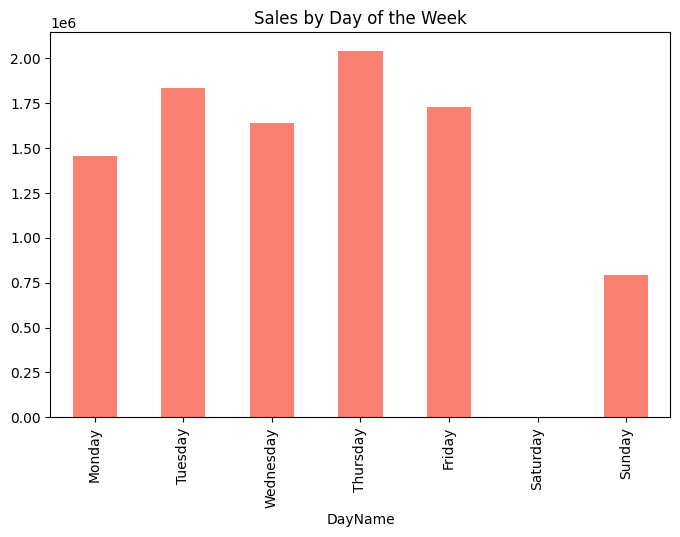

In [ ]:
d['DayName'] = d['InvoiceDate'].dt.day_name()
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_sales = d.groupby('DayName')['Total'].sum().reindex(day_order)

daily_sales.plot(kind='bar', color='salmon', figsize=(8, 5))
plt.title('Sales by Day of the Week')
plt.show()

In [ ]:

daily_data = d.copy()

daily_data.set_index('InvoiceDate', inplace=True)

daily_sales = daily_data['Total'].resample('D').sum().reset_index()

daily_sales.columns = ['Date', 'TotalSales']


In [ ]:
daily_sales.head()

,Date,TotalSales
0,2010-12-01,46517.72
1,2010-12-02,48738.67
2,2010-12-03,25199.88
3,2010-12-04,0.00
4,2010-12-05,31752.28


In [ ]:
daily_sales['Date'] = pd.to_datetime(daily_sales['Date'])


daily_sales['DayName'] = daily_sales['Date'].dt.day_name()

daily_sales.head()

,Date,TotalSales,DayName
0,2010-12-01,46517.72,Wednesday
1,2010-12-02,48738.67,Thursday
2,2010-12-03,25199.88,Friday
3,2010-12-04,0.00,Saturday
4,2010-12-05,31752.28,Sunday


In [ ]:
daily_sales_clean = daily_sales[daily_sales['TotalSales'] > 0].copy()#days w/o saturdays

daily_sales_clean.head()

,Date,TotalSales,DayName
0,2010-12-01,46517.72,Wednesday
1,2010-12-02,48738.67,Thursday
2,2010-12-03,25199.88,Friday
4,2010-12-05,31752.28,Sunday
5,2010-12-06,31759.89,Monday


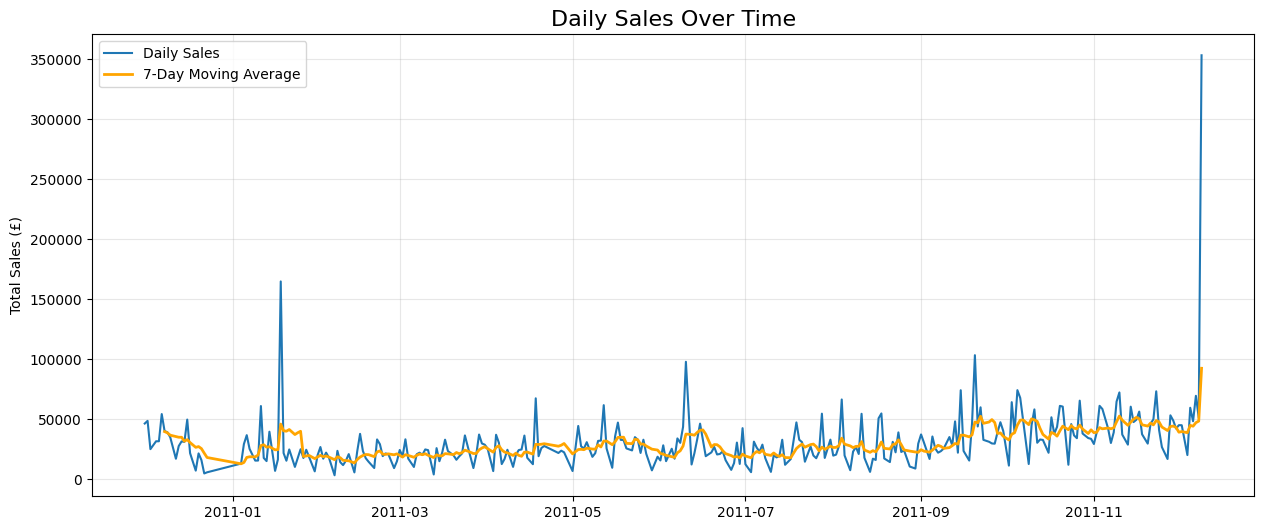

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))
plt.plot(daily_sales_clean['Date'], daily_sales_clean['TotalSales'], color='tab:blue', label='Daily Sales')

daily_sales_clean['7_Day_MA'] = daily_sales_clean['TotalSales'].rolling(window=7).mean()
plt.plot(daily_sales_clean['Date'], daily_sales_clean['7_Day_MA'], color='orange', linewidth=2, label='7-Day Moving Average')

plt.title('Daily Sales Over Time', fontsize=16)
plt.ylabel('Total Sales (£)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:

daily_sales_clean['Month'] = daily_sales_clean['Date'].dt.month
daily_sales_clean['DayOfWeek'] = daily_sales_clean['Date'].dt.dayofweek #0=Monday, 6=Sunday
daily_sales_clean['Quarter'] = daily_sales_clean['Date'].dt.quarter

daily_sales_clean['Lag_1'] = daily_sales_clean['TotalSales'].shift(1)

daily_sales_clean['Rolling_7'] = daily_sales_clean['TotalSales'].rolling(window=7).mean()

daily_sales_clean = daily_sales_clean.dropna()


In [ ]:
daily_sales_clean.head()

,Date,TotalSales,DayName,7_Day_MA,Month,DayOfWeek,Quarter,Lag_1,Rolling_7
14,2010-12-15,31252.40,Wednesday,31784.874286,12,2,4,31644.02,31784.874286
15,2010-12-16,49810.42,Thursday,33144.314286,12,3,4,31252.40,33144.314286
16,2010-12-17,21850.50,Friday,30658.962857,12,4,4,49810.42,30658.962857
18,2010-12-19,7310.55,Sunday,26692.854286,12,6,4,21850.50,26692.854286
19,2010-12-20,21646.44,Monday,27329.417143,12,0,4,7310.55,27329.417143


Training Days: 265
Testing Days: 34


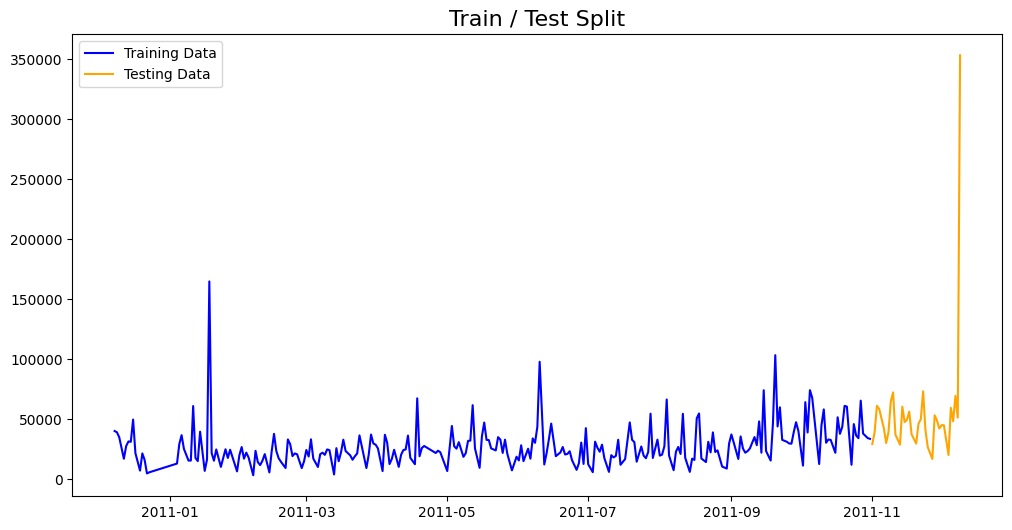

In [ ]:
cutoff_date = '2011-11-01'#for trainning and testing

train = daily_sales_clean[daily_sales_clean['Date'] < cutoff_date]
test = daily_sales_clean[daily_sales_clean['Date'] >= cutoff_date]

print(f"Training Days: {train.shape[0]}")
print(f"Testing Days: {test.shape[0]}")

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(train['Date'], train['TotalSales'], label='Training Data', color='blue')
plt.plot(test['Date'], test['TotalSales'], label='Testing Data', color='orange')
plt.title('Train / Test Split', fontsize=16)
plt.legend()
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

features = ['Month', 'DayOfWeek', 'Quarter', 'Lag_1', 'Rolling_7']
target = 'TotalSales'

X_train = train[features]
y_train = train[target]

X_test = test[features]
y_test = test[target]



In [ ]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
predictions = model.predict(X_test)

In [ ]:
mae = mean_absolute_error(y_test, predictions)
print(f"Mean Absolute Error: £{mae:,.2f}")
print(f"Average Daily Sales in Test Set: £{y_test.mean():,.2f}")

Mean Absolute Error: £18,246.17
Average Daily Sales in Test Set: £55,248.16


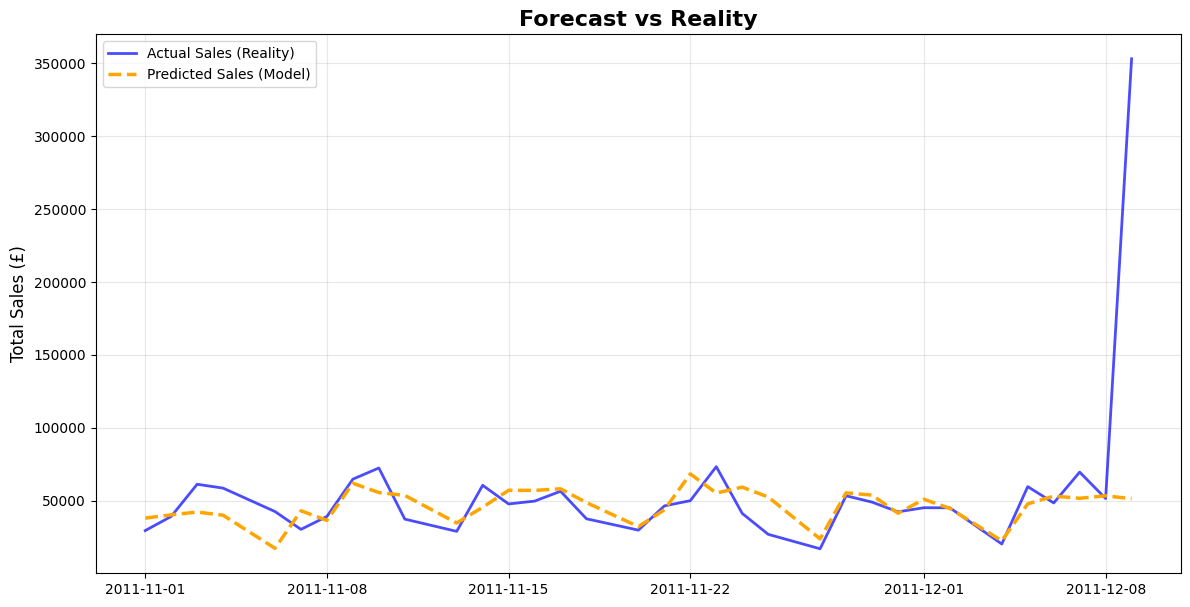

In [ ]:
import matplotlib.pyplot as plt

results = pd.DataFrame({'Date': test['Date'], 'Actual': y_test, 'Predicted': predictions})
results = results.sort_values('Date')

plt.figure(figsize=(14, 7))

plt.plot(results['Date'], results['Actual'], label='Actual Sales (Reality)', color='blue', linewidth=2, alpha=0.7)

plt.plot(results['Date'], results['Predicted'], label='Predicted Sales (Model)', color='orange', linestyle='--', linewidth=2.5)

plt.title('Forecast vs Reality', fontsize=16, fontweight='bold')
plt.ylabel('Total Sales (£)', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)

plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression


lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [ ]:

lr_predictions = lr_model.predict(X_test)


In [ ]:
lr_mae = mean_absolute_error(y_test, lr_predictions)

print(f"Linear Regression MAE: £{lr_mae:,.2f}")
print(f"Average Daily Sales in Test Set: £{y_test.mean():,.2f}")

Linear Regression MAE: £16,536.45
Average Daily Sales in Test Set: £55,248.16


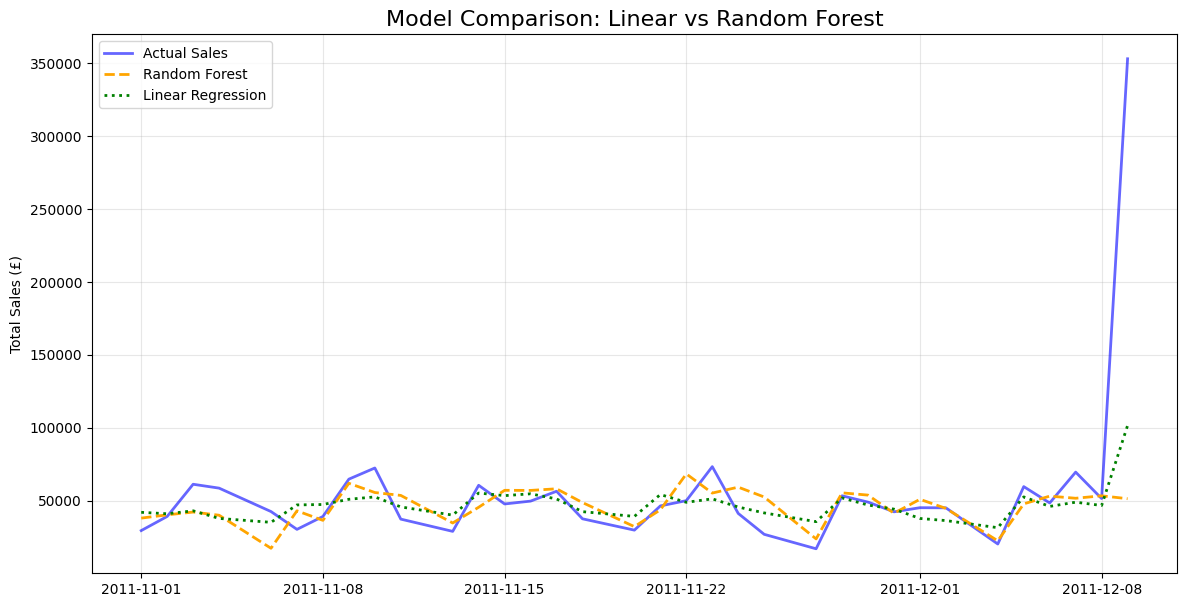

In [ ]:
plt.figure(figsize=(14, 7))

plt.plot(results['Date'], results['Actual'], label='Actual Sales', color='blue', alpha=0.6, linewidth=2)

plt.plot(results['Date'], results['Predicted'], label='Random Forest', color='orange', linestyle='--', linewidth=2)

plt.plot(test['Date'], lr_predictions, label='Linear Regression', color='green', linestyle=':', linewidth=2)

plt.title('Model Comparison: Linear vs Random Forest', fontsize=16)
plt.ylabel('Total Sales (£)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()